In [4]:
%pwd

'C:\\Users\\91842'

In [2]:
import numpy as np
import pandas as pd
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
d.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
d=pd.read_csv("C:/Users/91842/Documents/Crop_recommendation1.csv");d


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
#shape of dataset
print("shape of the dataset:",d.shape)


shape of the dataset: (2200, 8)


In [5]:
#To check the missing value in dataset
d.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
d["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [7]:
print("Average Ratio of nitrogen in the soil:{0:.2f}".format(d["N"].mean()))
print("Average Ratio of phosphorous in the soil:{0:.2f}".format(d["P"].mean()))
print("Average Ratio of potassium  in the soil:{0:.2f}".format(d["K"].mean()))
print("Average Ratio of temperature in celcius:{0:.2f}".format(d["temperature"].mean()))
print("Average Ralitive in humidity %:{0:.2f}".format(d["humidity"].mean()))
print("Average ph value of the soil:{0:.2f}".format(d["ph"].mean()))
print("Average rainfall in mm:{0:.2f}".format(d["rainfall"].mean()))

Average Ratio of nitrogen in the soil:50.55
Average Ratio of phosphorous in the soil:53.36
Average Ratio of potassium  in the soil:48.15
Average Ratio of temperature in celcius:25.62
Average Ralitive in humidity %:71.48
Average ph value of the soil:6.47
Average rainfall in mm:103.46


In [8]:
print("Average Ratio of nitrogen in the soil:{0:.2m}".format(d["N"].mean()))

ValueError: Unknown format code 'm' for object of type 'float'

In [ ]:

@interact
def summary(crops=list(d['label'].value_counts().index)):
    x=d[d['label']==crops]
    print('-------------------------------')
    print('statistics for nitrogen')
    print('statistics nitrogen min required:',x['N'].min())
    print('statistics nitrogen max  required:',x['N'].max())
    print('statistics nitrogen required:',x['N'].min())
    print('-------------------------------')
    print('statistics for phosphorous')
    print('statistics phosphorous required:',x['P'].min())
    print('statistics phosphorous required:',x['P'].max())
    print('statistics phosphorous required:',x['P'].min())
    print('-------------------------------')
    print('statistics for potassium')
    print('statistics potassium required:',x['K'].min())
    print('statistics potassium required:',x['K'].max())
    print('statistics potassium required:',x['K'].min())
    

In [ ]:
###let undrestand which crops can only grown in summer, winter and rainy sesons
print("summer crops")
print(d[(d["temperature"]>30) & (d["humidity"]>60)] ["label"].unique())
print("winter crops")
print(d[(d["temperature"]<20) & (d["humidity"]<30)] ["label"].unique())
print("rainy crops")
print(d[(d["rainfall"]>200) & (d["humidity"]>56)] ["label"].unique())

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
z=d.drop(["label"],axis=1)


In [ ]:
z=z.values

In [ ]:
print(z.shape)

In [ ]:
krange=range(1,11)
sse=[]
for k in krange:
    km=KMeans(k)
    km.fit(z)
    sse.append(km.inertia_)
    
number_clusters = range(1,11)
plt.plot(number_clusters,sse)
plt.title('The Elbow title',fontsize=20)
plt.xlabel('Number of clusters')
plt.ylabel('sse')    
    



In [ ]:
# let determine the optimum number of clusters within the dataset
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init= "k-means++",max_iter=300,n_init=10,random_state=0)
    km.fit(z)
    wcss.append(km.inertia_)
#plt the results
plt.plot(range(1,11),wcss)
plt.title("the elbow method",fontsize=20)
plt.xlabel("no of cluster")
plt.ylabel("wcss")
plt.show
    
    
    
    
    
    


In [9]:















#lets implement the k means algorithm toperform clustering analysis
km=KMeans(n_clusters=4,init= "k-means++",max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(z)

#let find out the results
a=d["label"]
y_means=pd.DataFrame(y_means)
m=pd.concat([y_means,a],axis=1)
m=m.rename(columns={0:"cluster"})
#let check the cluster of each crops
print("let check the result after applying the k means clustering analysis")
print("crops in first cluster:",m[m["cluster"]==0]["label"].unique())
print("---------------------------------------------------------------------")
print("crops in second cluster:",m[m["cluster"]==1]["label"].unique())
print("---------------------------------------------------------------------")
print("crops in third cluster:",m[m["cluster"]==2]["label"].unique())
print("---------------------------------------------------------------------")
print("crops in fourth cluster:",m[m["cluster"]==3]["label"].unique())

NameError: name 'KMeans' is not defined

In [10]:
y=d['label']
x=d.drop(['label'],axis=1)
print("shape of x:",x.shape)
print("shape of y:",y.shape)

shape of x: (2200, 7)
shape of y: (2200,)


In [11]:
#let create trainig and testing set for validation of result
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

print("the shape of x train:",x_train.shape)
print("the shape of y train:",y_train.shape)
print("the shape of x test:",x_test.shape)
print("the shape of y test:",y_test.shape)

the shape of x train: (1540, 7)
the shape of y train: (1540,)
the shape of x test: (660, 7)
the shape of y test: (660,)


In [57]:
##from create a predictive model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Users\91842\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print('/n')
print(classification_report(y_test,y_pred))

0.95
/n
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.84      0.87      0.86        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       0.84      0.96      0.90        28
      grapes       1.00      1.00      1.00        30
        jute       0.83      0.94      0.88        31
 kidneybeans       0.96      1.00      0.98        26
      lentil       0.91      0.91      0.91        22
       maize       0.92      0.81      0.86        27
       mango       1.00      1.00      1.00        28
   mothbeans       0.81      0.81      0.81        36
    mungbean       1.00      0.97      0.98        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       

Text(0.5, 1.0, 'confusion matrix oflogisticregression')

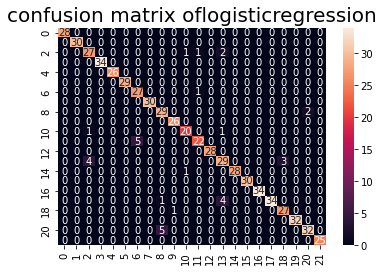

In [59]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.title("confusion matrix oflogisticregression",fontsize=20)

In [60]:
prediction=model.predict(np.array([[90,
                                     45,
                                     45,
                                     25,
                                     81,
                                     7,
                                     235,
                                    ]]))
print("the suggested crop for given climentic condition is:",prediction)

the suggested crop for given climentic condition is: ['rice']
